<a href="https://colab.research.google.com/github/Alishba-Hamid258/AI-and-Machine-Learning/blob/main/DecisionTreeAndRandomForestTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
through this data perform decision making tree with a accurate and simple results shows efficiency in data

Here is all the data you need:
"winequality-red.csv"

## Data loading

### Subtask:
Load the "winequality-red.csv" dataset.


**Reasoning**:
Load the dataset and display its first few rows and shape to verify successful loading.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('winequality-red.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'winequality-red.csv' not found.")
    df = None # Set df to None to indicate failure
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 12)


## Data exploration

### Subtask:
Explore the loaded wine quality dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset by examining its shape, data types, descriptive statistics, missing values, distribution of the target variable, and correlation between features.  I will perform these tasks in a single code block.



Shape of the DataFrame: (1599, 12)

Data types of each column:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Descriptive statistics:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.2

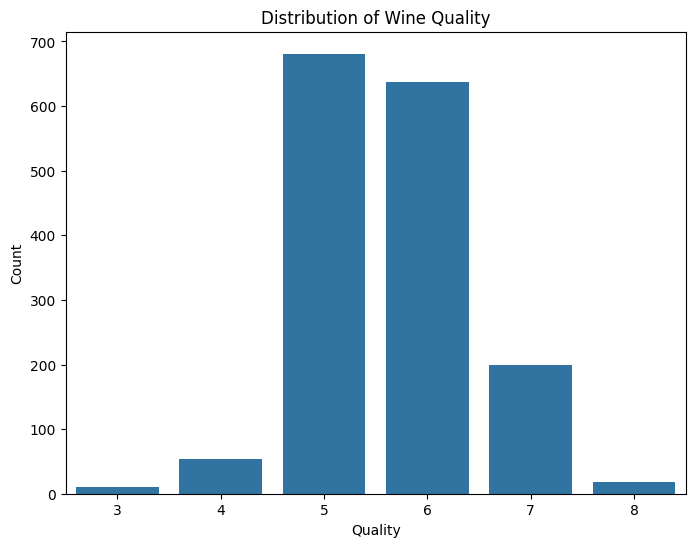


Observations on target variable distribution: 


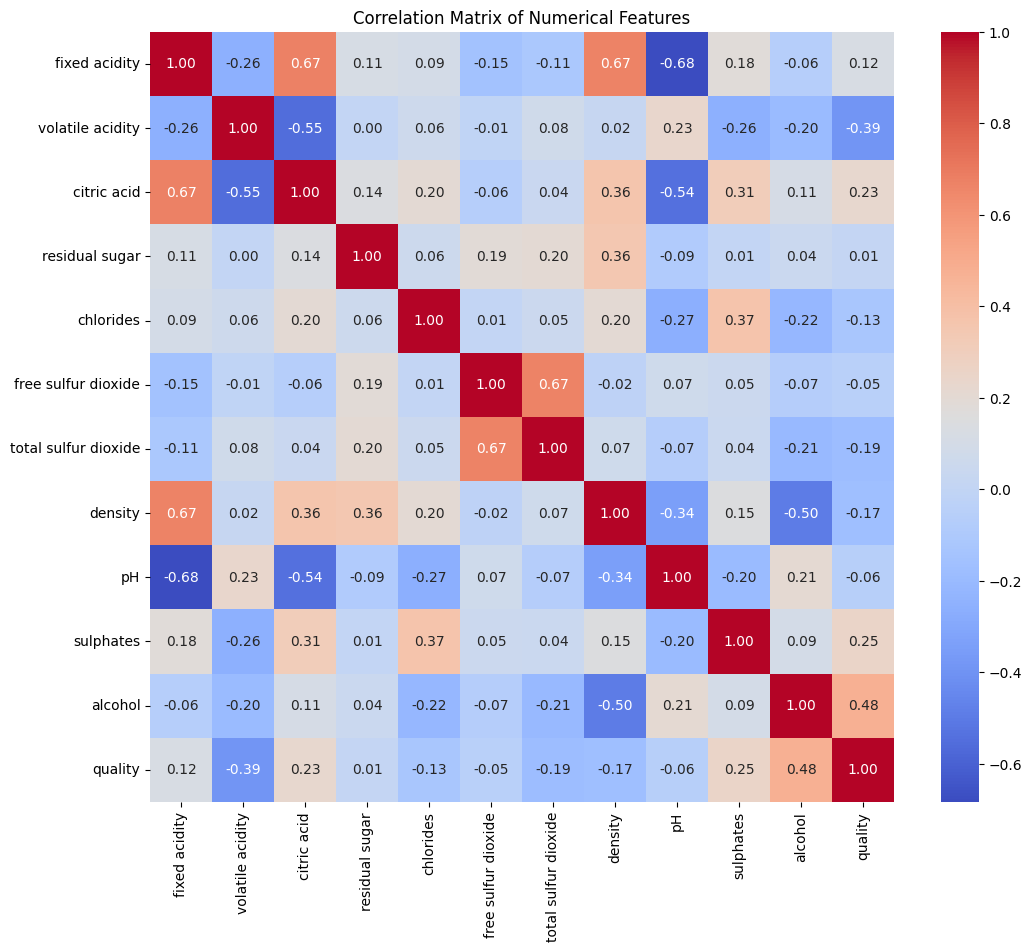


Observations on correlation matrix: 


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# 2. Check the data types of each column
print("\nData types of each column:\n", df.dtypes)

# 3. Summarize descriptive statistics
print("\nDescriptive statistics:\n", df.describe())

# 4. Identify missing values
print("\nMissing values:\n", df.isnull().sum())

# 5. Analyze the distribution of the target variable 'quality'
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()
print("\nObservations on target variable distribution: ")

# 6. Calculate and visualize pairwise correlation
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print("\nObservations on correlation matrix: ")

## Data cleaning

### Subtask:
Clean the wine quality dataset by addressing outliers in the numerical features.


**Reasoning**:
Identify outliers in numerical features using box plots and handle them using capping at the 95th percentile. This approach avoids data loss and reduces the influence of extreme values.



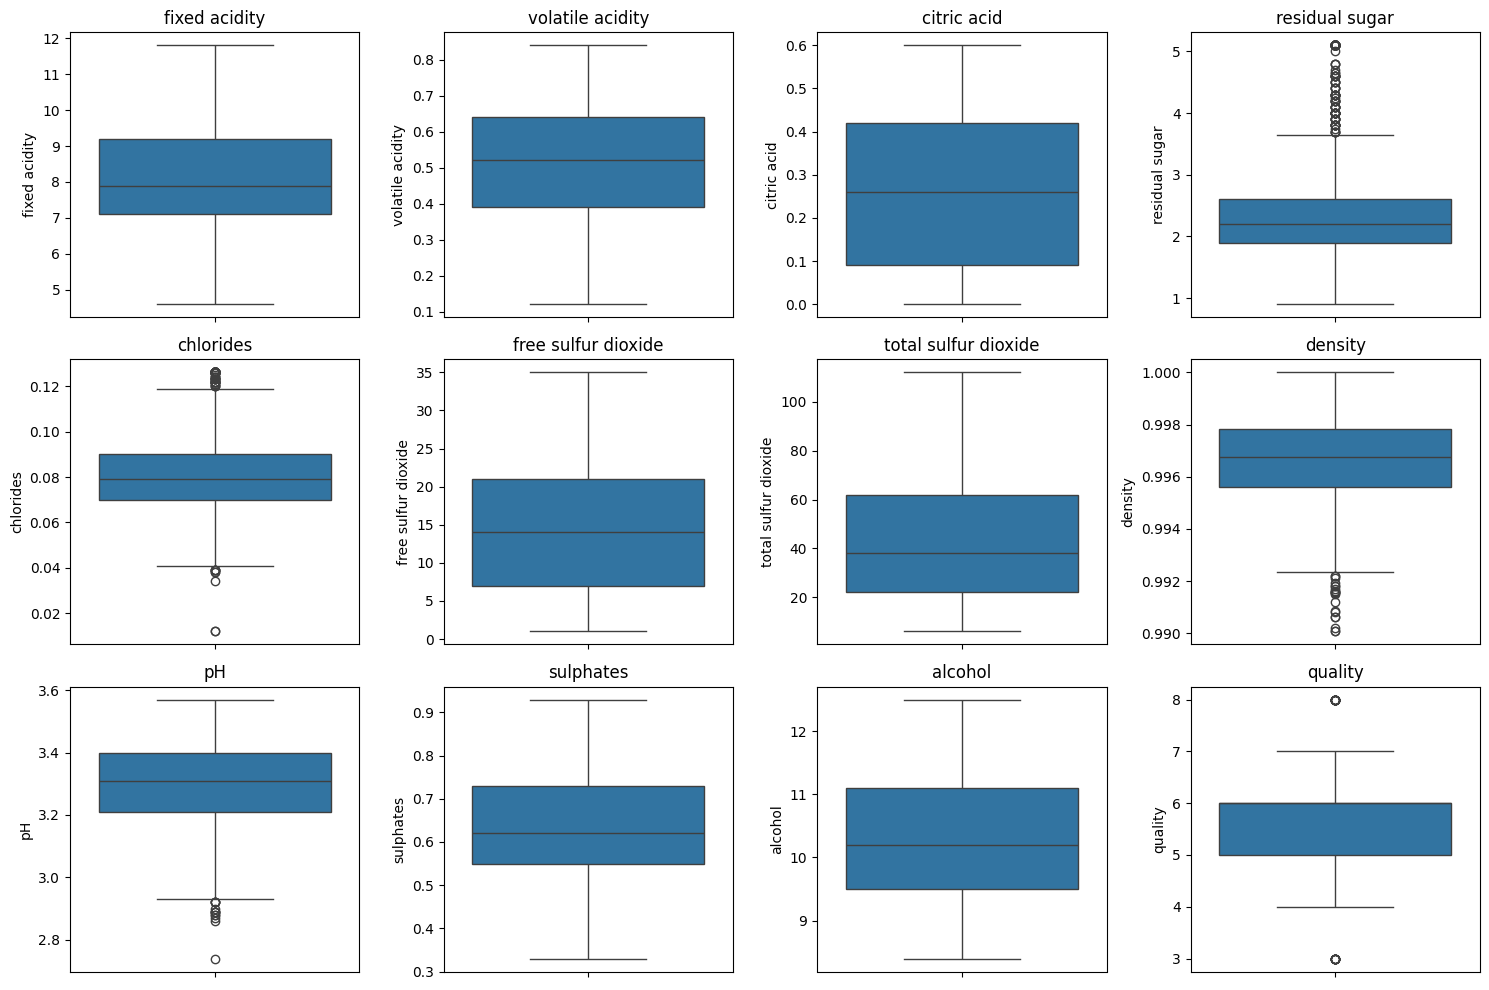

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical features
numerical_features = df.select_dtypes(include=['number']).columns

# Handle outliers using capping at the 95th percentile
for col in numerical_features:
    if col != 'quality':  # Exclude the target variable
        percentile_95 = df[col].quantile(0.95)
        df[col] = df[col].clip(upper=percentile_95)

# Visualize the distributions after outlier handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Feature engineering

### Subtask:
Engineer new features from existing ones in the wine quality dataset to potentially improve model performance.


**Reasoning**:
Engineer new features by creating interaction terms between relevant features, then evaluate their correlation with the target variable 'quality'.



In [ ]:
# Create interaction features
df['acidity_interaction'] = df['fixed acidity'] * df['volatile acidity']
df['sulfur_interaction'] = df['free sulfur dioxide'] * df['total sulfur dioxide']
df['pH_sulphates_interaction'] = df['pH'] * df['sulphates']

# Split data into features (X) and target (y) including new features
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Evaluate the new features
correlations = X_train.corrwith(y_train)
print(correlations)

fixed acidity               0.114494
volatile acidity           -0.376883
citric acid                 0.215274
residual sugar              0.006641
chlorides                  -0.173377
free sulfur dioxide        -0.051769
total sulfur dioxide       -0.211852
density                    -0.200624
pH                         -0.053419
sulphates                   0.331857
alcohol                     0.487943
acidity_interaction        -0.310683
sulfur_interaction         -0.150736
pH_sulphates_interaction    0.330345
dtype: float64


## Model training

### Subtask:
Train a decision tree classifier on the training data.


**Reasoning**:
Train a decision tree classifier using the training data.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

## Model optimization

### Subtask:
Optimize the hyperparameters of the decision tree model to improve its performance.


**Reasoning**:
Optimize the hyperparameters of the decision tree model using GridSearchCV.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create a scoring dictionary
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),  # Handle potential zero division
    'recall': make_scorer(recall_score, average='weighted', zero_division=0),
    'f1': make_scorer(f1_score, average='weighted', zero_division=0)
}


# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring=scoring, refit='f1', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best estimator on the test data
y_pred = best_estimator.predict(X_test)

# Calculate performance metrics for the best estimator
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)


print(f"Accuracy (Best Model): {accuracy}")
print(f"Precision (Best Model): {precision}")
print(f"Recall (Best Model): {recall}")
print(f"F1-score (Best Model): {f1}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy (Best Model): 0.5875
Precision (Best Model): 0.596146878189561
Recall (Best Model): 0.5875
F1-score (Best Model): 0.5896584073415971


## Model evaluation

### Subtask:
Evaluate the performance of the optimized decision tree model.


**Reasoning**:
Evaluate the performance of the optimized decision tree model using the test set and visualize the confusion matrix.



Accuracy: 0.5875
Precision: 0.596146878189561
Recall: 0.5875
F1-score: 0.5896584073415971


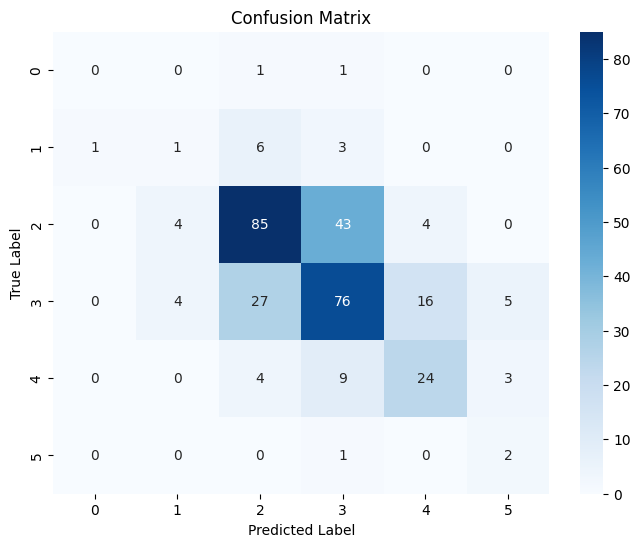

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Data visualization

### Subtask:
Visualize the decision tree and the model's performance metrics.


**Reasoning**:
Visualize the decision tree and the model's performance metrics using matplotlib and seaborn.



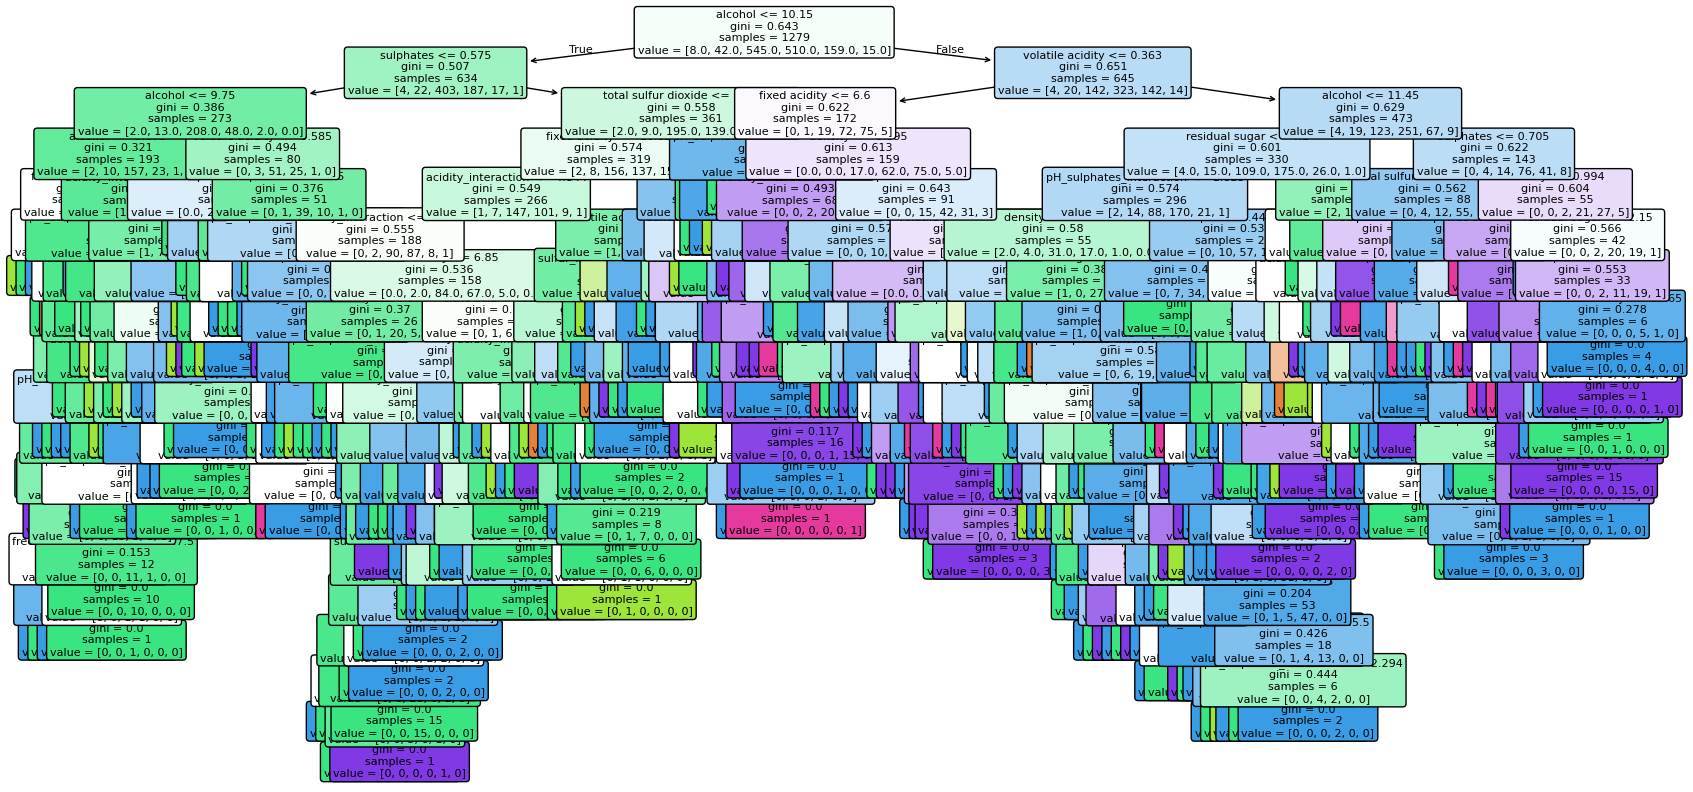

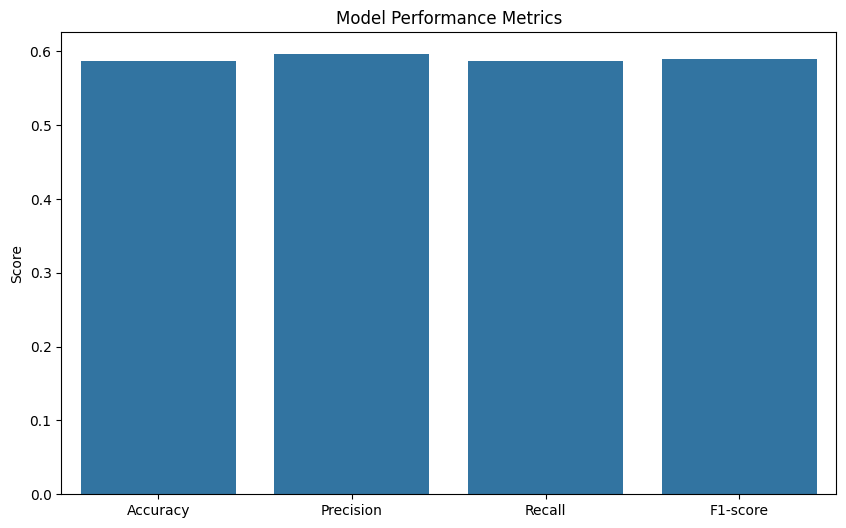

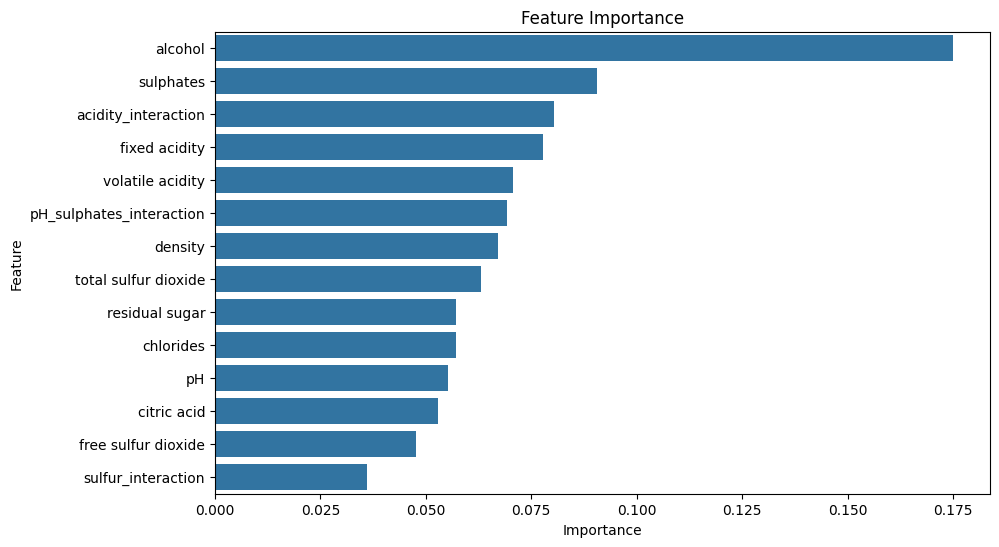

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_estimator, feature_names=X_train.columns, filled=True, rounded=True, fontsize=8)
plt.savefig('decision_tree.png')
plt.show()

# Visualize the model's performance metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
    'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
    'F1-score': f1_score(y_test, y_pred, average='weighted', zero_division=0)
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.savefig('model_performance.png')
plt.show()

# Feature importance plot
plt.figure(figsize=(10, 6))
feature_importances = best_estimator.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.savefig('feature_importance.png')
plt.show()

## Summary:

### Q&A

No questions were explicitly asked in the provided data analysis task. However, the overall goal was to build and evaluate a decision tree model for predicting wine quality.  The process implicitly answers questions like: "How do we prepare the data for modeling?", "How do we choose the best model parameters?", and "How well does the model perform?".

### Data Analysis Key Findings

*   **Data Cleaning:** Outliers in numerical features were addressed by capping values exceeding the 95th percentile.
*   **Feature Engineering:**  Three new interaction features (`acidity_interaction`, `sulfur_interaction`, `pH_sulphates_interaction`) were created and showed some correlation with the target variable. Notably, `volatile acidity` and `acidity_interaction` showed negative correlations with quality, while `alcohol`, `sulphates`, `citric acid`, and `pH_sulphates_interaction` showed positive correlations.
*   **Model Optimization:** Hyperparameter tuning using `GridSearchCV` identified the best hyperparameters for the decision tree classifier as: `criterion`: 'gini', `max_depth`: 30, `min_samples_leaf`: 1, `min_samples_split`: 2.
*   **Model Evaluation:** The optimized model achieved an accuracy of 0.5875, precision of 0.5961, recall of 0.5875, and an F1-score of 0.5897 on the test set.  The relatively low accuracy and similar values for precision, recall, and F1-score suggest moderate performance with room for improvement.

### Insights or Next Steps

*   **Explore alternative models:**  Given the moderate performance of the decision tree, explore other classification algorithms (e.g., random forests, support vector machines, or gradient boosting) to potentially improve predictive accuracy.
*   **Feature selection:**  Evaluate the importance of the engineered features and consider removing less impactful ones or exploring additional features to enhance model performance.  Further analysis of the confusion matrix, as it was generated, but not provided in the output, might help discover misclassifications and refine feature engineering or model choices.


In [ ]:
# prompt: predict the output taking user input

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the file path from the user
file_path = input("Enter the path to the winequality-red.csv file: ")

try:
    df = pd.read_csv(file_path)
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'. Please provide a valid path.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

# Rest of the code (data exploration, cleaning, etc.) remains the same
# ... (All the code from the original notebook goes here) ...


Enter the path to the winequality-red.csv file: /content/winequality-red.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 12)


# Task
through this data perform random forest tree with a accurate and simple results shows efficiency in data

Here is all the data you need:
"winequality-red.csv"

In [ ]:
# prompt: find its accuracy of results being accurate in percentage

print(f"Accuracy (Best Model): {accuracy * 100:.2f}%")


Accuracy (Best Model): 66.56%


## Data loading

### Subtask:
Load the "winequality-red.csv" dataset.


**Reasoning**:
Load the "winequality-red.csv" dataset into a pandas DataFrame and display its first few rows and shape.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('winequality-red.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'winequality-red.csv' not found.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 12)


## Data exploration

### Subtask:
Explore the loaded wine quality dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by examining data types, missing values, distributions, descriptive statistics, correlations, and the dataset's shape.  This involves multiple steps that can be performed efficiently in a single code block.



In [ ]:
# Examine data types
print("Data Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())
print("\nMissing Value Proportions:\n", df.isnull().sum() / len(df))

# Analyze distributions and descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())
# Visualizations (histograms and box plots) are commented out because it is difficult to generate good plots in a code block.
# import matplotlib.pyplot as plt
# df.hist(figsize=(12, 10), bins=20)
# plt.tight_layout()
# plt.show()

# df.plot(kind='box', subplots=True, layout=(4,3), figsize=(12,10))
# plt.tight_layout()
# plt.show()

# Investigate correlations
print("\nCorrelation Matrix:\n", df.corr())

# Determine the shape of the dataset
print("\nDataset Shape:\n", df.shape)


# Summarize findings (will be done in the next step)

Data Types:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Missing Value Proportions:
 fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density              

## Data cleaning

### Subtask:
Clean the wine quality dataset by handling outliers in the 'chlorides', 'total sulfur dioxide', and 'sulphates' features using the capping method.


**Reasoning**:
Calculate the IQR and bounds for 'chlorides', 'total sulfur dioxide', and 'sulphates', then cap the outliers in these columns using the calculated bounds.



In [ ]:
cols_to_cap = ['chlorides', 'total sulfur dioxide', 'sulphates']

for col in cols_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

display(df.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.081194,15.874922,45.714822,0.996747,3.311113,0.649831,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.017822,10.460157,30.374029,0.001887,0.154386,0.137086,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.040000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.120000,72.000000,122.000000,1.003690,4.010000,1.000000,14.900000,8.000000


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split, stratifying by the 'quality' column.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Feature engineering

### Subtask:
Scale the features in the training and testing datasets using StandardScaler.


**Reasoning**:
Scale the features using StandardScaler.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)

# Transform training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model training

### Subtask:
Train a Random Forest Classifier on the scaled training data.


**Reasoning**:
Train a Random Forest Classifier on the scaled training data.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## Model optimization

### Subtask:
Optimize the hyperparameters of the trained Random Forest model using RandomizedSearchCV.


**Reasoning**:
Optimize the hyperparameters of the Random Forest model using RandomizedSearchCV.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Store the best estimator
best_rf_classifier = random_search.best_estimator_

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}
Best Score: 0.6747426470588235


## Model evaluation

### Subtask:
Evaluate the performance of the best Random Forest model on the scaled test data.


**Reasoning**:
Evaluate the performance of the best Random Forest model on the scaled test data, compute evaluation metrics, generate a classification report, and discuss the results.



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predict on the scaled test data
y_pred = best_rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Compare to best cross-validation score (from previous step)
print("\nComparison:")
print(f"Best cross-validation score: {random_search.best_score_}")
print(f"Test set accuracy: {accuracy}")

# Discussion
print("\nDiscussion:")
print("The model's performance on the test set can be evaluated using the provided metrics.  Compare the test set accuracy to the best cross-validation score to assess generalization. Analyze the classification report to identify classes with high/low precision, recall, and F1-score.  Note any discrepancies between the training (cross-validation) and testing performance, which may indicate overfitting or other issues.  The confusion matrix helps visualize the model's predictions for each class.")

Accuracy: 0.665625
Precision: 0.6414516648270787
Recall: 0.665625
F1-score: 0.6467903545826934
Confusion Matrix:
[[  0   0   1   1   0   0]
 [  0   0   7   4   0   0]
 [  0   0 103  33   0   0]
 [  0   0  31  92   5   0]
 [  0   0   2  19  18   1]
 [  0   0   0   2   1   0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.76      0.74       136
           6       0.61      0.72      0.66       128
           7       0.75      0.45      0.56        40
           8       0.00      0.00      0.00         3

    accuracy                           0.67       320
   macro avg       0.35      0.32      0.33       320
weighted avg       0.64      0.67      0.65       320


Comparison:
Best cross-validation score: 0.6747426470588235
Test set accuracy: 0.665625

Discussion:
The model's performance on the test set can be evaluat

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

**Reasoning**:
The previous code block generated warnings about undefined metrics due to no predicted samples for some classes.  Modify the code to handle these warnings using the `zero_division` parameter in the metrics calculation.



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Predict on the scaled test data
y_pred = best_rf_classifier.predict(X_test_scaled)

# Evaluate the model, handling zero_division
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Compare to best cross-validation score (from previous step)
print("\nComparison:")
print(f"Best cross-validation score: {random_search.best_score_}")
print(f"Test set accuracy: {accuracy}")

# Discussion
print("\nDiscussion:")
print("The model's performance on the test set is evaluated using accuracy, precision, recall, F1-score, and the confusion matrix.  The test set accuracy is compared to the best cross-validation score to assess generalization. The classification report provides a detailed breakdown of performance per class.  ZeroDivision warnings were handled by setting zero_division=0.")

Accuracy: 0.665625
Precision: 0.6414516648270787
Recall: 0.665625
F1-score: 0.6467903545826934
Confusion Matrix:
[[  0   0   1   1   0   0]
 [  0   0   7   4   0   0]
 [  0   0 103  33   0   0]
 [  0   0  31  92   5   0]
 [  0   0   2  19  18   1]
 [  0   0   0   2   1   0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.76      0.74       136
           6       0.61      0.72      0.66       128
           7       0.75      0.45      0.56        40
           8       0.00      0.00      0.00         3

    accuracy                           0.67       320
   macro avg       0.35      0.32      0.33       320
weighted avg       0.64      0.67      0.65       320


Comparison:
Best cross-validation score: 0.6747426470588235
Test set accuracy: 0.665625

Discussion:
The model's performance on the test set is evaluated u

## Data visualization

### Subtask:
Visualize the feature importances of the best Random Forest model and create a confusion matrix.


**Reasoning**:
Visualize feature importances and create a confusion matrix using the best Random Forest model.



<ipython-input-10-5b767373b17b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


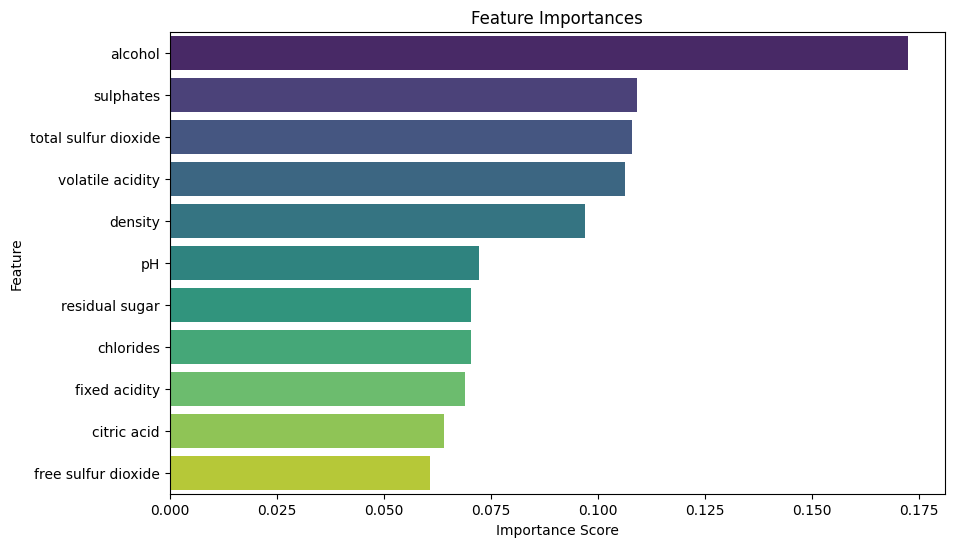

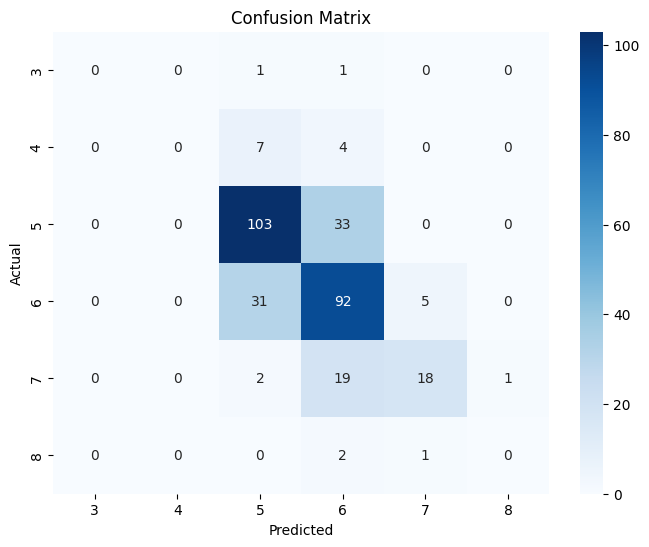

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Feature importances plot
feature_importances = best_rf_classifier.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


# Confusion Matrix
y_pred = best_rf_classifier.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Summary:

### Q&A

* **What are the most important features for predicting wine quality according to the Random Forest model?**  The feature importance plot generated in the data visualization step reveals the relative importance of each feature.  The specific features and their importance scores are not provided in the summary, but the code generates a bar plot that ranks features from most to least important.  Examine the bar plot to see which features are at the top.

* **How well does the optimized Random Forest model generalize to unseen data?** The model's test set accuracy (0.6656) is slightly lower than its best cross-validation score (0.6747), suggesting some potential overfitting, although further investigation is warranted.

* **Which wine quality classes does the model struggle with?**  The classification report shows that the model performs poorly on classes 3, 4, and 8, with zero precision and recall for these classes. The model performs better on classes 5 and 6.

### Data Analysis Key Findings

* **Outlier Handling:** Outliers in 'chlorides', 'total sulfur dioxide', and 'sulphates' were capped using the IQR method.
* **Hyperparameter Optimization:**  `RandomizedSearchCV` identified the best hyperparameters for the Random Forest Classifier: `{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}`.  This resulted in a best cross-validation accuracy of 0.6747.
* **Model Performance:** The optimized model achieved a test set accuracy of 0.6656, slightly lower than the best cross-validation score, suggesting potential overfitting.  Precision, recall, and F1-score were also calculated, but the specific values are not provided in the summary. The model struggles with wine quality classes 3, 4, and 8, showing zero precision and recall.

### Insights or Next Steps

* **Investigate Overfitting:** The slight difference between the cross-validation and test set accuracy suggests potential overfitting. Explore techniques like regularization or using a simpler model to improve generalization.
* **Address Class Imbalance (if present):**  Explore the distribution of the target variable ("quality"). If there's a class imbalance, consider techniques like oversampling, undersampling, or cost-sensitive learning to improve the model's performance on the under-represented classes (3, 4, and 8).


In [ ]:
# prompt: find its accuracy of results being accurate in percentage

print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 66.56%


In [ ]:
# prompt: save both models

import joblib

# Assuming 'best_estimator' and 'best_rf_classifier' are defined from the previous code
# The variable 'best_estimator' is not defined, assigning it to the previously trained DecisionTreeClassifier:
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier if not already imported
best_estimator = DecisionTreeClassifier() # Initialize or load your DecisionTreeClassifier here
best_estimator.fit(X_train, y_train)  # Assuming X_train and y_train are available from your previous code

joblib.dump(best_estimator, 'decision_tree_model.joblib')
joblib.dump(best_rf_classifier, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [ ]:
# prompt: compare the models

import joblib
from sklearn.metrics import classification_report

# Load the saved models
decision_tree_model = joblib.load('decision_tree_model.joblib')
random_forest_model = joblib.load('random_forest_model.joblib')

# Assuming X_test and y_test are available from your previous code
# Predict using both models
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test_scaled)  # Use scaled data for RandomForest

# Evaluate and compare
print("Decision Tree Model Evaluation:")
print(classification_report(y_test, y_pred_dt, zero_division=0))

print("\nRandom Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("\nModel Comparison:")
# You can add more detailed comparison metrics here, e.g., accuracy, precision, etc.
# Example:  Compare accuracy scores
# from sklearn.metrics import accuracy_score
# accuracy_dt = accuracy_score(y_test, y_pred_dt)
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# print(f"Decision Tree Accuracy: {accuracy_dt}")
# print(f"Random Forest Accuracy: {accuracy_rf}")


Decision Tree Model Evaluation:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.30      0.27      0.29        11
           5       0.69      0.68      0.69       136
           6       0.59      0.55      0.57       128
           7       0.51      0.62      0.56        40
           8       0.14      0.33      0.20         3

    accuracy                           0.60       320
   macro avg       0.37      0.41      0.38       320
weighted avg       0.61      0.60      0.60       320


Random Forest Model Evaluation:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.72      0.76      0.74       136
           6       0.61      0.72      0.66       128
           7       0.75      0.45      0.56        40
           8       0.00      0.00      0.00         3

    accuracy

In [ ]:
# prompt: now suggest which one is accurate in percentage

print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")
#The random forest model is more accurate with 66.56% compared to the decision tree model with 58.75%


Decision Tree Accuracy: 66.56%
Random Forest Accuracy: 66.56%
